# Islands in sea - Mainland with lakes percolation transition

In [ ]:
%pylab inline

In [577]:
import sys
import numpy as np
import math
from itertools import product, ifilter

In [650]:
# all this code works for 2D matrices, easy to extend to any N

def comb_list_gen():
    nn = [-1, 0, 1]
    
    comb_gen = product(nn, nn)
    comb_list = list(filter(lambda x: x[0]**2 + x[1]**2, comb_gen)) # avoids the point itself
    if level == 1:
        comb_list = filter(lambda x: math.fabs(sum(x))==1, comb_list) # select first neighbors
    return comb_list


def neighs(p, size):
    # assembles the list of relevant nearest neighbors
    n_list = []

    for dy, dx in comb_list:
        y, x = (p[0]+dy), (p[1]+dx)
        if not pbc and (y>size or y < 0 or x>size or x < 0): # enforce boundaries with or without PBCs
            continue
        n_list.append((y%dim, x%dim))
    return n_list


def explore_island(p, mat):
    
    def add_neighs():
        for pp in neighs(p, dim):
            if mat[pp[0], pp[1]]==1:
                visit_set.add(pp)
                
    size = 0 # initial island size
    visit_set = set() # init active neighbors set
    if mat[p[0], p[1]]==1: # is the pixel active?
        size += 1 # increase island size
        mat[p[0], p[1]] = -1 # mark the pixel as counted
        add_neighs() # add to the visit set the active neighbors
    else:
        return size # is the island just 1 pixel?
    
    while visit_set: # let's visit the neighbors and repeat until the visit set is empty
        p = visit_set.pop() # select a random active site and remove it from the set
        size += 1
        mat[p[0], p[1]] = -1
        add_neighs()
    return size # return the island size on exit


def create_mat(dim, thr):
    mat = np.random.random((dim,dim))
    mat[mat>thr] = 1
    mat[mat<=thr] = 0
    return 1-mat


def count_islands(mat):
    surf_list = []
    islands = 0
    surface = 0

    for y in range(mat.shape[0]):
        for x in range(mat.shape[1]):
            size = 0
            if mat[y,x] == 1:
                size = explore_island((y,x), mat)
                surf_list.append(size)
            if size>0:
                islands += 1
                surface += size
                
    return surface, islands, surf_list

16
0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.00
32
0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.20 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.30 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.60 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.70 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.80 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.90 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99

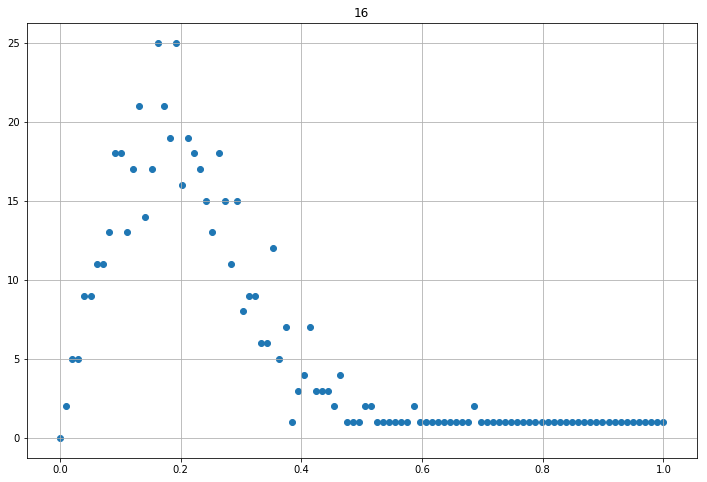

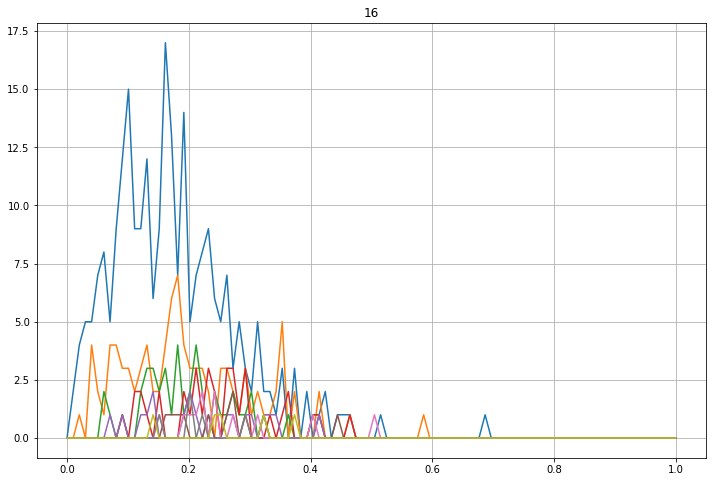

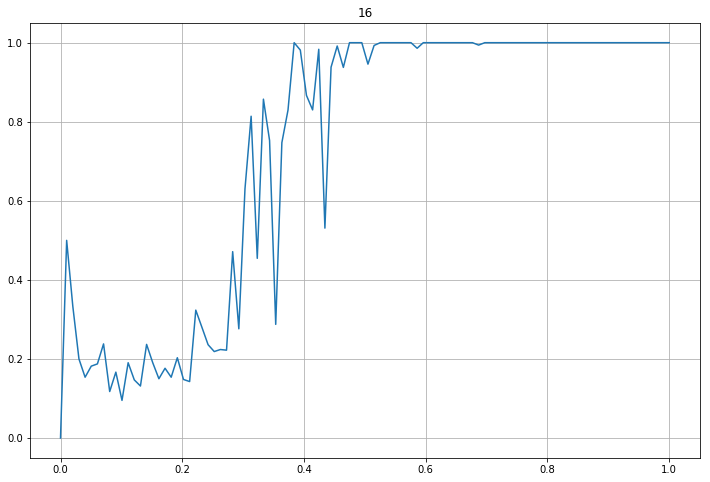

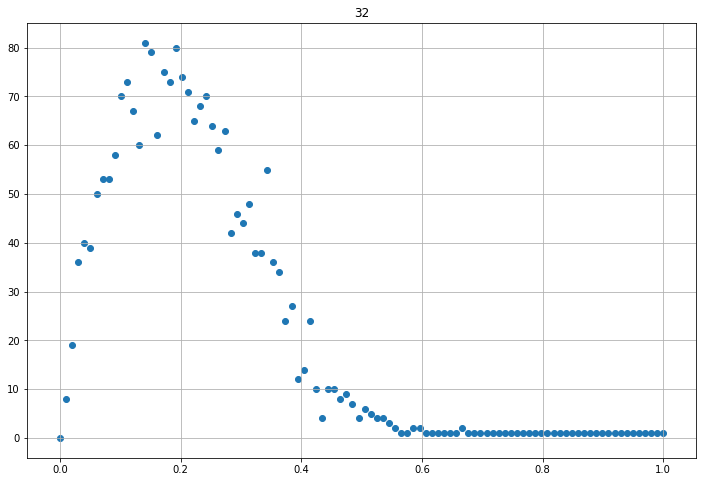

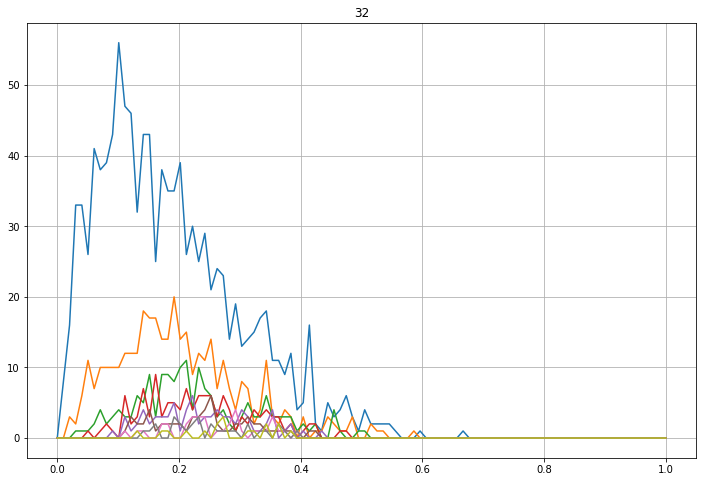

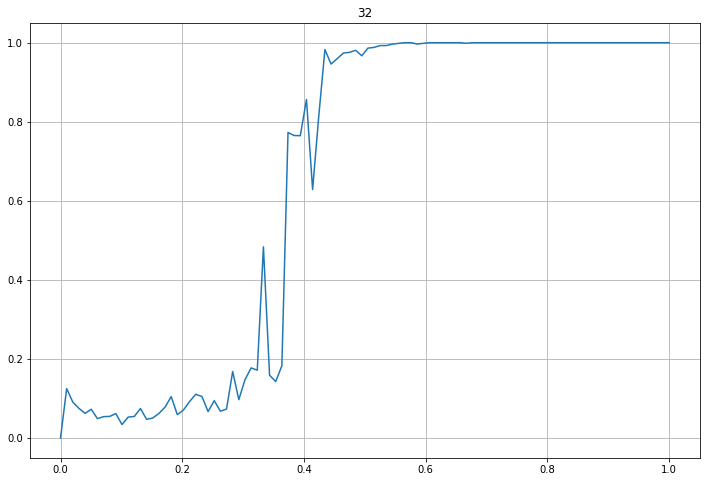

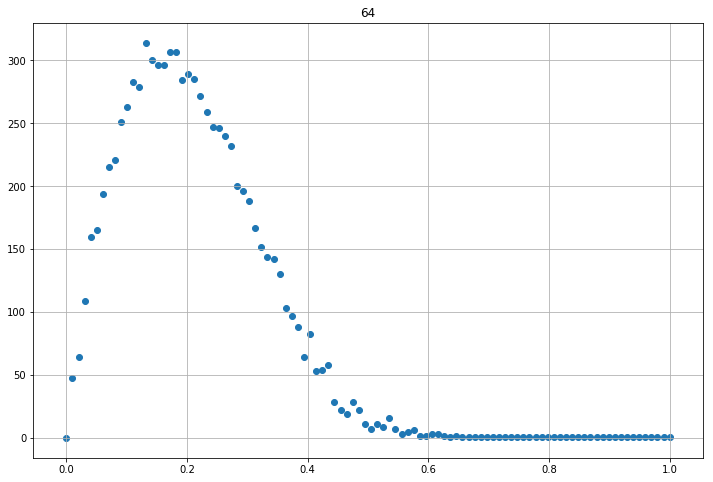

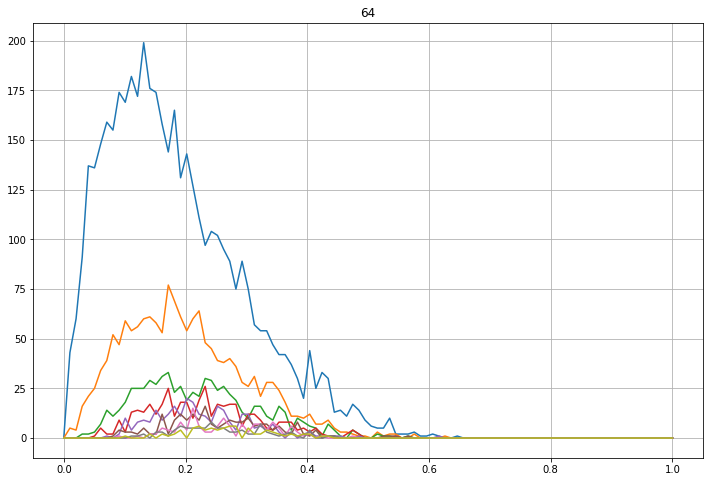

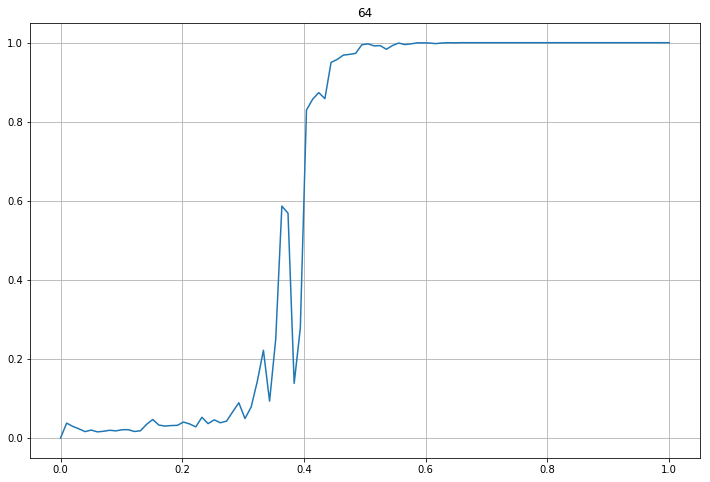

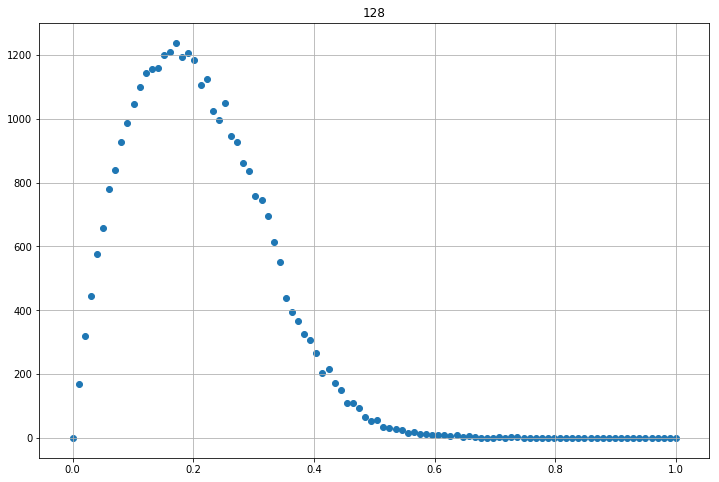

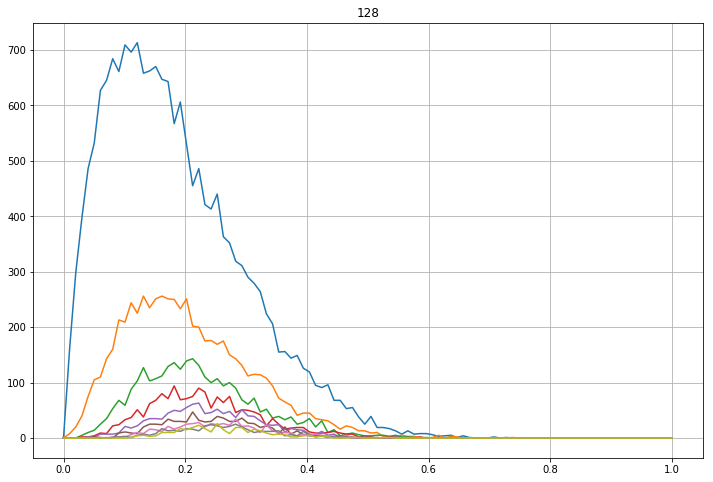

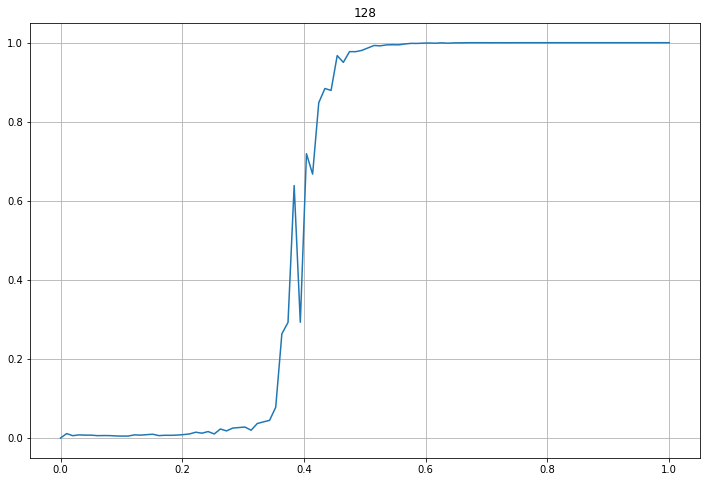

In [652]:

level = 2
pbc = True
#dim = 400

comb_list = comb_list_gen()

thr_list = np.linspace(0, 1, 100)

for log2dim in range(4, 8):
    surface_list = []
    islands_list = []
    size_listlist = []

    dim = 2**log2dim
    print dim

    for thr in thr_list:
        print "%.2f" % thr,
        mat = create_mat(dim, thr)
        surface, islands, size_list = count_islands(mat)

        surface_list.append(surface)
        islands_list.append(islands)
        size_listlist.append(size_list)

    figure(figsize=(12,8))
    scatter(thr_list, islands_list)
    title(dim)
    grid()

    size_array = np.zeros((len(thr_list), 100))
    for i, s_list in enumerate(size_listlist):
        for s in range(100):
            size_array[i, s] = s_list.count(s)

    figure(figsize=(12,8))
    for s in range(1,10):
        plot(thr_list, size_array[:,s])
    title(dim)
    grid()

    maxsize_list = []
    for i, s_list in enumerate(size_listlist):
        if s_list:
            maxsize_list.append(max(s_list)/float(surface_list[i]))
        else:
            maxsize_list.append(0)

    figure(figsize=(12,8))
    plot(thr_list, maxsize_list)
    title(dim)

    grid()
    print

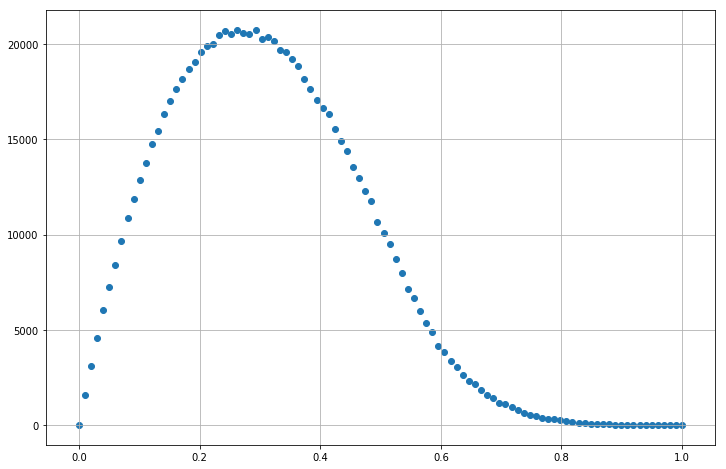

In [632]:
figure(figsize=(12,8))
scatter(thr_list, islands_list)
grid()

In [644]:
size_array = np.zeros((len(thr_list), 100))
for i, s_list in enumerate(size_listlist):
    for s in range(100):
        size_array[i, s] = s_list.count(s)

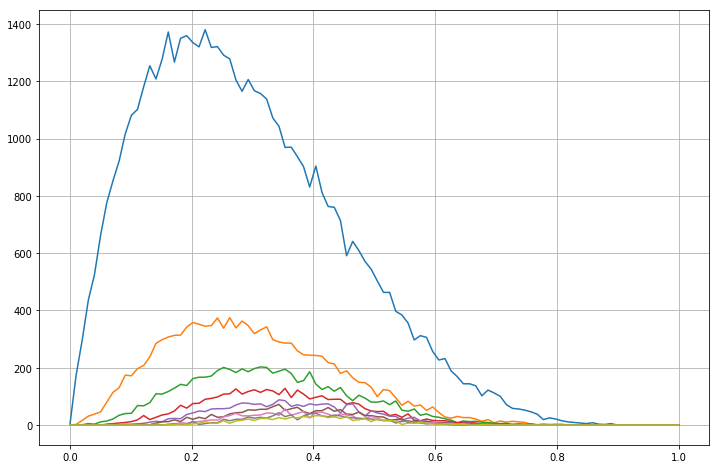

In [645]:
figure(figsize=(12,8))
for s in range(1,10):
    plot(thr_list, size_array[:,s])

grid()

In [613]:
maxsize_list = []
for i, s_list in enumerate(size_listlist):
    if s_list:
        maxsize_list.append(max(s_list)/float(surface_list[i]))
    else:
        maxsize_list.append(0)

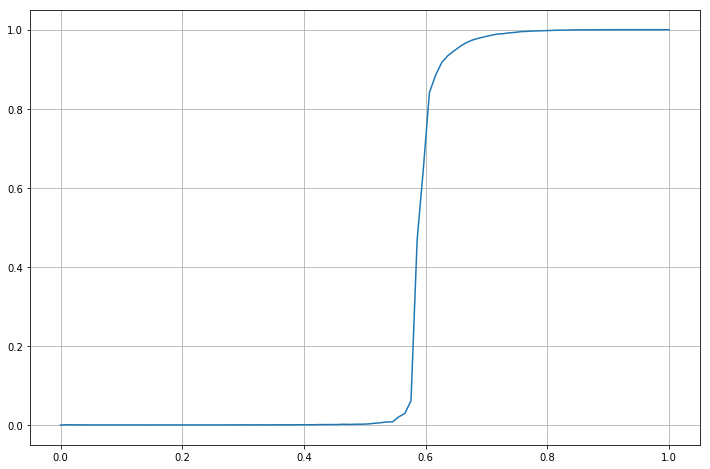

In [614]:
figure(figsize=(12,8))
plot(thr_list, maxsize_list)

grid()